['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


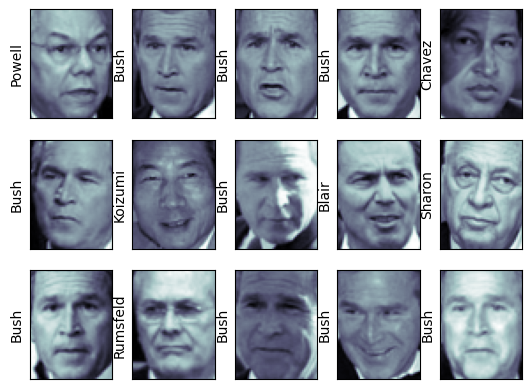

In [43]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.target_names) #ชื่อเจ้าของใบหน้า
print(faces.images.shape) #(1348, 62, 47) จำนวนภาพ,height,width 62x47=2914 Pixel

#แสดงภาพ
fig,ax=plt.subplots(3,5) #ภาพ3แถว 5คอลัมป์
for i ,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone') #แสดงภาพที่อยู่ในindex นั้นๆ
    axi.set(xticks=[],yticks=[]) #ลบค่าแกนxและyออก                                        
    axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1],color='black') # faces.target[i]].split()[-1]="George W Bush".split() จะได้เป็น ["George", "W", "Bush"]"
plt.show()


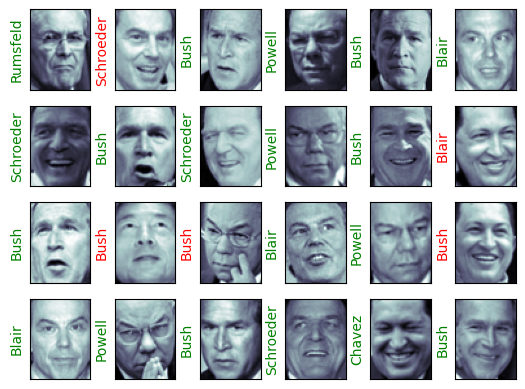

In [37]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

faces = fetch_lfw_people(min_faces_per_person=60)

#reduce & create model

#ลดข้อมูลให้เหลือแค่150 , วิธีการคำนวณแบบsvd randomized ลดข้อมูลอย่างมีประสิทธิภาพ และประหยัดเวลาและทรัพยากรด้วย ,Whiten ปรับข้อมูลให้สมดุล ทำให้โมเดลมีประสิทธิภาพมากขึ้น
pca = PCA(n_components=150,svd_solver="randomized",whiten=True)
#ใช้ svm ในการทำงาน ใช้lernel rbf สามารถจัดการกับความสัมพันธ์ที่ซับซ้อนระหว่างตัวแปรได้ , ใช้balanced ให้โมเดลไม่ลำเอียงค่าใดค่าหนึ่ง
svc = SVC(kernel='rbf',class_weight="balanced") #kernal สามารถเปลี่ยนได้มีหลายรูปแบบ

#ทำการรวม pca และ svc
model = make_pipeline(pca,svc)

#train & test 

#แบ่งข้อมูลในการ train & test , random_state เพื่อให้ข้อมูลคงที่
x_train,x_test,y_train,y_test = train_test_split(faces.data,faces.target,random_state=40)

#จะหาค่า c กับ gamma ที่เหมาะสม เพื่อเพิ่มประสิทธิภาพให้ svc ทำงานได้ดีขึ้น
#การหาค่าที่เหมาะสมของ C และ gamma ช่วยให้โมเดลมีความสามารถในการจำแนกประเภทที่ดีขึ้น โดยการทำให้โมเดลสามารถเรียนรู้จากข้อมูลได้อย่างมีประสิทธิภาพทั้งในข้อมูลฝึกและข้อมูลทดสอบ
param={
    "svc__C":[1,5,10,50],
    "svc__gamma":[0.0001,0.0005,0.001,0.005]
} 

#train test model
#หาค่าc กับ gamma ที่เหมาะสม 
grid = GridSearchCV(model,param)
grid.fit(x_train,y_train)
#เลือกค่าC gamma ให้เหมาะสมL 
# print(grid.best_params_) #{'svc__C': 1, 'svc__gamma': 0.005}
# print(grid.best_estimator_) #model ที่ดีที่สุึด
model = grid.best_estimator_ #มีการเก็บค่า c และ gamma ที่เหมายสมแล้วพร้อมที่จะเอาไปทำนาย 
                         
#predict
y_pred = model.predict(x_test)

#show real image & predict name
fig,ax=plt.subplots(4,6)
for i ,axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
    color='green' if y_pred[i] == y_test[i] else 'red' )#ถ้าภาพถูกสีเขียว ผิดสีแดง
plt.show()


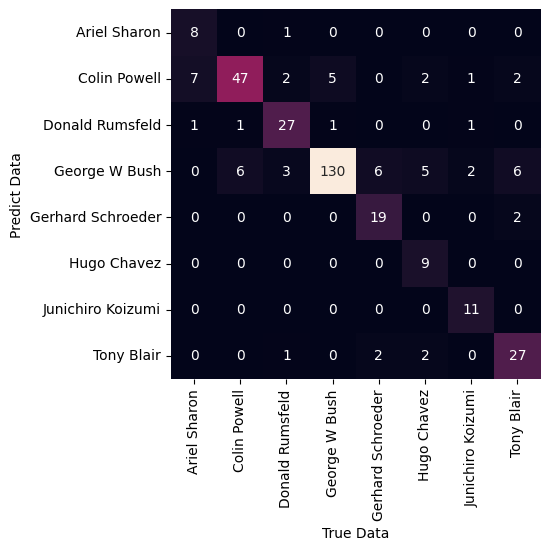

Accuracy =  82.49258160237389


In [41]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sb
faces = fetch_lfw_people(min_faces_per_person=60)

#reduce & create model

pca = PCA(n_components=150,svd_solver="randomized",whiten=True)
svc = SVC(kernel='rbf',class_weight="balanced") #kernal สามารถเปลี่ยนได้มีหลายรูปแบบ

model = make_pipeline(pca,svc)

#train & test 
x_train,x_test,y_train,y_test = train_test_split(faces.data,faces.target,random_state=40)

param={
    "svc__C":[1,5,10,50],
    "svc__gamma":[0.0001,0.0005,0.001,0.005]
} #จะหาค่า c กับ gamma ที่เหมาะสม

#train test model
#หาค่าc กับ gamma ที่เหมาะสม
grid = GridSearchCV(model,param)
grid.fit(x_train,y_train)
#เลือกค่าC gamma ให้เหมาะสมL 
# print(grid.best_params_) #{'svc__C': 1, 'svc__gamma': 0.005}
# print(grid.best_estimator_) #model ที่ดีที่สุึด
model = grid.best_estimator_
                         
#predict
y_pred = model.predict(x_test)

#Accuracy Score ความแม่นยำ
mat = confusion_matrix(y_test,y_pred)
sb.heatmap(mat.T,square=True,annot=True,fmt="d",cbar=False,
           xticklabels=faces.target_names,
           yticklabels=faces.target_names
           )
plt.xlabel("True Data")
plt.ylabel("Predict Data")
plt.show()
print("Accuracy = ",accuracy_score(y_test,y_pred) *100)